In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df= pd.read_csv(r"C:\Users\DELL\Documents\Datasets\Diwali Sales Data.csv", encoding= 'unicode_escape')
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [2]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


1. What is the average age of customers in the dataset?

In [3]:
df["Age"].mean()

35.421207003821884

2. How many unique product categories are there?

In [4]:
df["Product_Category"].nunique()

18

3. What is the total sales amount for the entire dataset?

In [5]:
df["Amount"].sum()

106249132.43

4. Which state has the highest total sales?

In [6]:
df.groupby("State")["Amount"].sum().idxmax()   #idxmax used to get the maximum 

'Uttar Pradesh'

5. How many male and female customers are there in the dataset?

In [7]:
df.groupby("Gender")["Gender"].count()

Gender
F    7842
M    3409
Name: Gender, dtype: int64

In [8]:
gender_counts = df['Gender'].value_counts()
gender_counts

F    7842
M    3409
Name: Gender, dtype: int64

6. What is the most common occupation among customers?

In [9]:
occu_count= df["Occupation"].value_counts().idxmax()
occu_count

'IT Sector'

7. Calculate the average amount spent per order.

In [10]:
avg_amount= df["Amount"].mean()
avg_amount

9453.610857727557

8. How many customers fall into each age group (Age Group column)?

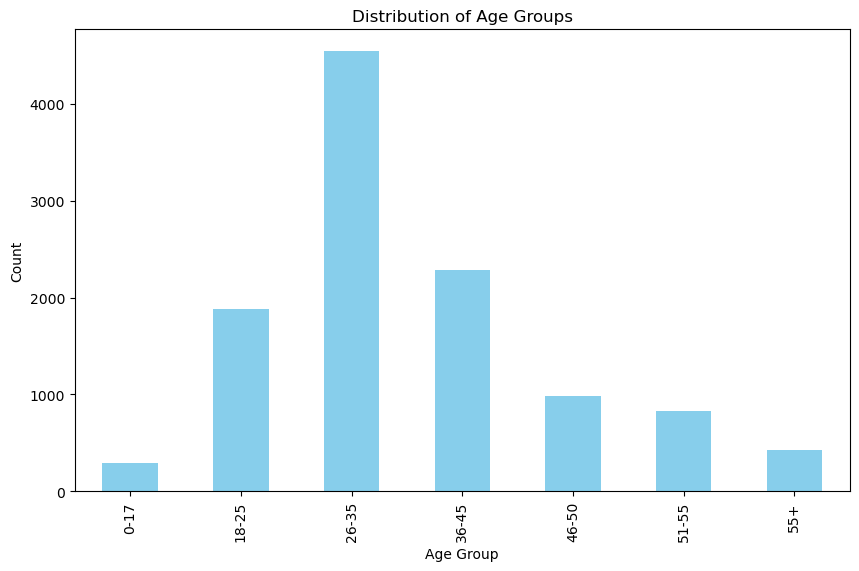

In [13]:
age_group_count= df["Age Group"].value_counts()
plt.figure(figsize=(10, 6))
age_group_count.sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

9. What is the median number of orders per customer?

In [12]:
df.groupby("Cust_name")["Orders"].median().median()

2.5

10. Calculate the total sales for each product category.

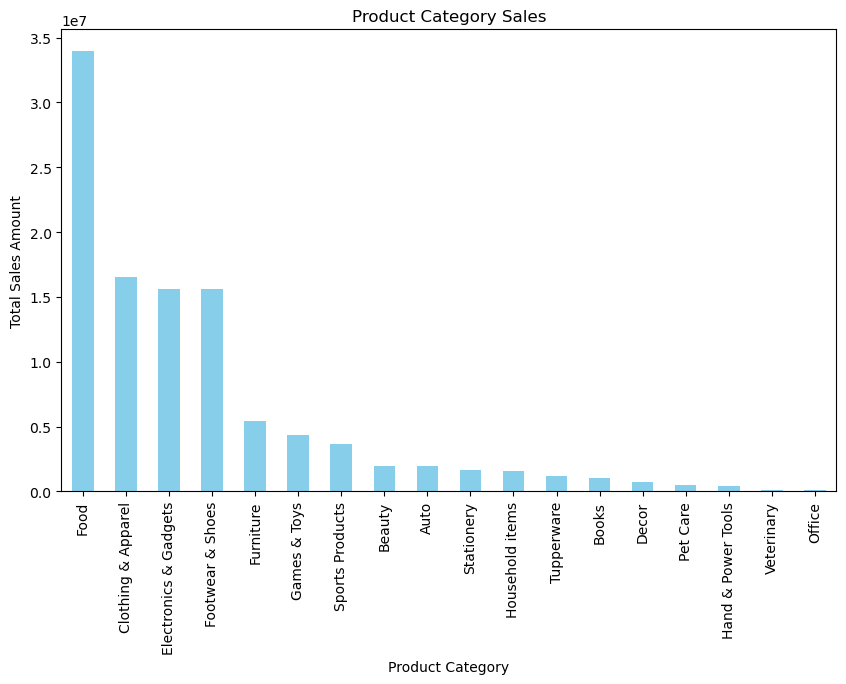

In [18]:
prod_cat_sales= df.groupby("Product_Category")["Amount"].sum().sort_values(ascending= False)
plt.figure(figsize=(10, 6))
prod_cat_sales.sort_values(ascending=False).plot(kind='bar', stacked=True, color='skyblue')
plt.title('Product Category Sales')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.show()

11. What is the correlation between Age and Amount?

In [109]:
corr_age_amt= df["Age"].corr(df["Amount"])
corr_age_amt

0.030941321745294494

12. Which product had the highest average order amount?

In [20]:
high_order_amt= df.groupby("Product_ID")["Orders"].mean().round(2).idxmax()
high_order_amt

Product_ID
P00000142    2.38
P00000242    2.50
P00000342    3.20
P00000442    1.00
P00000542    3.00
             ... 
P0099042     3.17
P0099242     2.71
P0099342     2.50
P0099442     2.50
P0099742     3.00
Name: Orders, Length: 2351, dtype: float64

13. What is the percentage of married customers in the dataset?

In [111]:
formula= ((((df["Marital_Status"]==1).sum())/(df["Marital_Status"].count()))*100).round(2)
formula

42.03

In [112]:
#another mothod.
formula1= (df['Marital_Status'] == 1).mean() 
formula1

0.4203181939383166

What is the average order amount for each age group (Age Group column)?

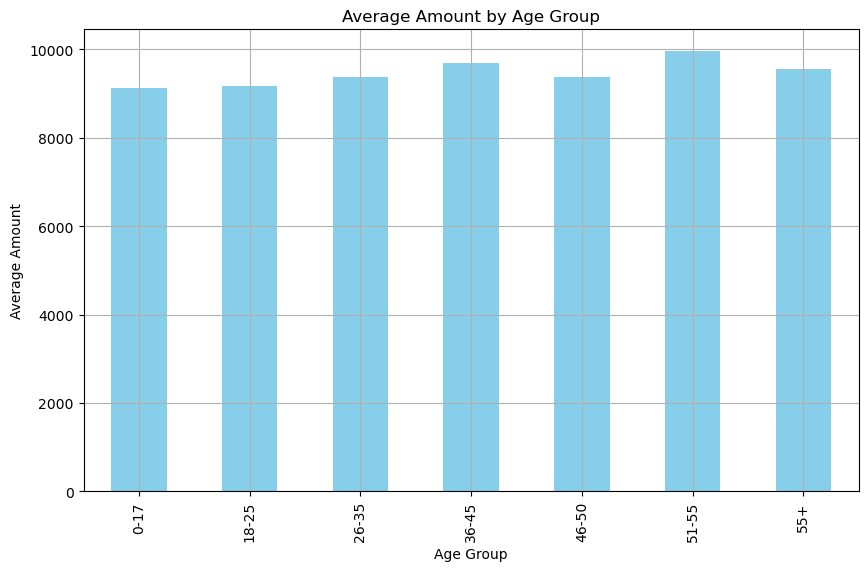

In [22]:
avg_amt_age= df.groupby("Age Group")["Amount"].mean().round(2)
plt.figure(figsize=(10, 6))
avg_amt_age.sort_index().plot(kind='bar', color='skyblue', grid= True)
plt.title('Average Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Amount')
plt.show()

Calculate the total sales for each state and sort them in descending order.

In [115]:
state_sale= df.groupby("State", as_index=False)["Amount"].sum().sort_values(by="Amount",ascending= False)
state_sale

,State,Amount
14,Uttar Pradesh,19374968.00
10,Maharashtra,14427543.00
7,Karnataka,13523540.00
2,Delhi,11603819.45
9,Madhya Pradesh,8101142.00
0,Andhra Pradesh,8037146.99
5,Himachal Pradesh,4963368.00
4,Haryana,4220175.00
1,Bihar,4022757.00
3,Gujarat,3946082.00


Find the product category with the highest median order amount.

In [116]:
prod_med= df.groupby("Product_Category")["Orders"].median().idxmax()
prod_med

'Beauty'

Determine the top 5 states with the highest average order amount.

In [117]:
state_avg_order= df.groupby("State")["Orders"].mean().idxmax()
state_avg_order

'Himachal Pradesh'

Calculate the total sales for each product category within each state.

In [118]:
sales_of_state_prod= df.groupby(by=["State", "Product_Category"])["Amount"].sum()
sales_of_state_prod

State           Product_Category     
Andhra Pradesh  Auto                     1133837.99
                Beauty                    183891.00
                Books                      38681.00
                Clothing & Apparel       1029062.00
                Electronics & Gadgets    2123529.00
                                            ...    
Uttarakhand     Office                       587.00
                Pet Care                   37230.00
                Sports Products            32539.00
                Stationery                  8660.00
                Tupperware                 29366.00
Name: Amount, Length: 241, dtype: float64

Identify the top 10 customers (User_ID) who have made the most orders.

In [119]:
cust_order= df.groupby("User_ID")["Orders"].sum().sort_values( ascending= False).head(10)
cust_order

User_ID
1001680    58
1003476    57
1003808    55
1001941    52
1006036    52
1004682    51
1002665    50
1004725    50
1000424    48
1004425    48
Name: Orders, dtype: int64

Calculate the average order amount for each product category, and then find the category with the highest average order amount.

In [123]:
prod_order= df.groupby("Product_Category")["Orders"].mean().idxmax()
prod_order

'Hand & Power Tools'

Calculate the percentage of order amount that have a Marital_Status of "Married."

In [132]:
married_orders= df[df['Marital_Status']== 1]["Orders"].sum()
total_orders= df["Orders"].sum()
percent_orders= ((married_orders/total_orders)*100).round(2)
percent_orders

41.95

Find the state with the highest average age among customers.

In [136]:
state_avg_age= df.groupby("State")["Age"].mean().idxmax()
state_avg_age

'Telangana'

Calculate the total sales for each zone within each state.

In [141]:
state_zone_sale= df.groupby(by= ["State", "Zone"], as_index=False)["Amount"].sum().sort_values(by= "Amount", ascending= False)
state_zone_sale

,State,Zone,Amount
14,Uttar Pradesh,Central,19374968.00
10,Maharashtra,Western,14427543.00
7,Karnataka,Southern,13523540.00
2,Delhi,Central,11603819.45
9,Madhya Pradesh,Central,8101142.00
0,Andhra Pradesh,Southern,8037146.99
5,Himachal Pradesh,Northern,4963368.00
4,Haryana,Northern,4220175.00
1,Bihar,Eastern,4022757.00
3,Gujarat,Western,3946082.00


Identify the top 5 products (Product_ID) that generated the most revenue.

In [145]:
prod_rev= df.groupby("Product_ID", as_index= False)["Amount"].sum().sort_values(by= "Amount", ascending= False).head(5)
prod_rev

,Product_ID,Amount
1680,P00265242,540136.0
645,P00110942,424833.0
1147,P00184942,401816.0
655,P00112142,341020.0
397,P00059442,338571.0


Calculate the total sales for each product category within each occupation.

In [154]:
prod_cat_occu_sales= df.groupby(by=["Product_Category", "Occupation"])["Amount"].sum()
prod_cat_occu_sales

Product_Category  Occupation  
Auto              Agriculture      18609.0
                  Automobile      165586.0
                  Aviation        244129.0
                  Banking         253553.0
                  Construction     80219.0
                                    ...   
Veterinary        Hospitality      10614.0
                  IT Sector        17690.0
                  Lawyer            2804.0
                  Media              738.0
                  Retail            3478.0
Name: Amount, Length: 263, dtype: float64

Determine the percentage of male and female customers in each age group.

In [152]:
age_grp_gender_percent= df.groupby(by= ["Age Group", "Gender"])["Gender"].count()
age_grp_gender_percent

Age Group  Gender
0-17       F          162
           M          134
18-25      F         1305
           M          574
26-35      F         3271
           M         1272
36-45      F         1581
           M          705
46-50      F          696
           M          291
51-55      F          554
           M          278
55+        F          273
           M          155
Name: Gender, dtype: int64

In [153]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


Calculate the average order amount for each combination of gender and marital status.

In [156]:
gen_marry_order= df.groupby(by= ["Gender", "Marital_Status"])["Orders"].mean().round(2)
gen_marry_order

Gender  Marital_Status
F       0                 2.49
        1                 2.50
M       0                 2.50
        1                 2.45
Name: Orders, dtype: float64

Identify the top 3 product categories for each state based on total sales amount.

In [160]:
state_prod_cat_sales= df.groupby(by= ["Product_Category", "State"], as_index= False)["Amount"].sum().sort_values(by= "Amount", ascending= False).head(3)
state_prod_cat_sales

,Product_Category,State,Amount
91,Food,Uttar Pradesh,7983142.00
87,Food,Maharashtra,6421531.00
95,Footwear & Shoes,Delhi,5027449.45


Find the state with the highest total sales for each product category.

In [161]:
state_prod_cat_sale= df.groupby(["State", "Product_Category"])["Amount"].sum().idxmax()
state_prod_cat_sale

('Uttar Pradesh', 'Food')

Calculate the total sales for each product category for customers aged 25-35 (inclusive) and 36-45 (inclusive), and compare the results.

In [173]:
def age_group(row):
    if 25 <= row['Age'] <= 35:
        return '25-35'
    elif 36 <= row['Age'] <= 45:
        return '36-45'

df['Age_Group'] = df.apply(age_group, axis=1)
total_sales_by_age_group = df.groupby(['Age_Group', 'Product_Category'])['Amount'].sum()
total_sales_by_age_group

Age_Group  Product_Category     
25-35      Auto                       979518.99
           Beauty                     811961.00
           Books                      468222.00
           Clothing & Apparel        6991326.00
           Decor                      278096.00
           Electronics & Gadgets     6543021.00
           Food                     14432906.50
           Footwear & Shoes          6267052.45
           Furniture                 2357872.00
           Games & Toys              1880539.00
           Hand & Power Tools         182302.00
           Household items            852627.00
           Office                      32199.00
           Pet Care                   209505.00
           Sports Products           1466924.00
           Stationery                 792834.00
           Tupperware                 337618.00
           Veterinary                  64590.00
36-45      Auto                       310653.00
           Beauty                     359672.00
       

Determine the average order amount for each age group within each occupation category.

In [179]:
age_occup_sales= df.groupby(by= ["Age Group", "Occupation"])["Orders"].mean().round(2)
age_occup_sales

Age Group  Occupation 
0-17       Agriculture    3.44
           Automobile     2.18
           Aviation       1.93
           Banking        2.50
           Chemical       2.08
                          ... 
55+        IT Sector      2.52
           Lawyer         2.80
           Media          2.58
           Retail         1.95
           Textile        2.61
Name: Orders, Length: 105, dtype: float64

Find the top 5 customers (User_ID) who have made the most orders within each state.

In [186]:
df.groupby(["State","User_ID"])["Orders"].sum().groupby("State", group_keys=False).nlargest(5)

State           User_ID
Andhra Pradesh  1003824    10
                1002544     9
                1001298     8
                1001680     8
                1001980     8
                           ..
Uttarakhand     1004323     7
                1005604     7
                1000195     6
                1001680     6
                1003709     6
Name: Orders, Length: 80, dtype: int64

Calculate the total sales for each combination of occupation and gender.

In [187]:
occup_gender_sales= df.groupby(["Occupation", "Gender"])["Amount"].sum()
occup_gender_sales

Occupation       Gender
Agriculture      F          1840482.00
                 M           752605.00
Automobile       F          3768843.00
                 M          1599753.00
Aviation         F          9007393.00
                 M          3594905.00
Banking          F          7792295.95
                 M          2978315.00
Chemical         F          3665084.00
                 M          1632352.00
Construction     F          2595422.00
                 M          1002089.00
Food Processing  F          2825277.00
                 M          1245393.00
Govt             F          6002907.00
                 M          2514305.00
Healthcare       F          8968232.49
                 M          4066355.00
Hospitality      F          4183199.00
                 M          2193206.00
IT Sector        F         10184835.00
                 M          4570244.00
Lawyer           F          3383409.00
                 M          1598256.00
Media            F          4375029.99
 

Identify the top 3 products (Product_ID) with the highest average order amount for customers aged 18-24 (inclusive).

In [197]:
def age_group2(row):
    if 18<=row["Age"]>=24:
        return "18-24"
df["Age_group2"]= df.apply(age_group2, axis=1)
prod_age_order= df[df["Age_group2"]== "18-24"].groupby("Product_ID")["Amount"].mean().nlargest(3)
prod_age_order

Product_ID
P00200842    23770.0
P00271842    23515.0
P00105042    23066.0
Name: Amount, dtype: float64

Determine the state with the highest total sales in each zone.

In [208]:
state_sales= df.groupby(["Zone", "State"])["Amount"].sum().reset_index()
state_sales= state_sales.loc[state_sales.groupby("Zone")["Amount"].idxmax()]
state_sales

,Zone,State,Amount
2,Central,Uttar Pradesh,19374968.0
4,Eastern,Bihar,4022757.0
7,Northern,Himachal Pradesh,4963368.0
11,Southern,Karnataka,13523540.0
15,Western,Maharashtra,14427543.0


Calculate the percentage of orders that have an above-average order amount within each product category.

In [216]:
avg_order_amount = df['Amount'].mean()
percentage_above_avg_by_category = df.groupby('Product_Category')['Amount'].apply(lambda x: (x > avg_order_amount).mean() * 100)
percentage_above_avg_by_category

Product_Category
Auto                     96.000000
Beauty                    0.000000
Books                    73.786408
Clothing & Apparel        0.000000
Decor                    28.125000
Electronics & Gadgets    25.299473
Food                     82.150020
Footwear & Shoes         82.706767
Furniture                88.385269
Games & Toys             80.569948
Hand & Power Tools       88.461538
Household items           0.000000
Office                    0.000000
Pet Care                  0.000000
Sports Products          63.764045
Stationery               75.892857
Tupperware               86.111111
Veterinary                0.000000
Name: Amount, dtype: float64

In [219]:
df["Amount"].mean()

9453.610857727557

In [3]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')